In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Random dataset.csv")

# Display the column names to verify their correctness
print("Column names:", df.columns)

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Concatenate the 'Headline', 'Content', and 'Human Summary' columns
if all(col in df.columns for col in ['Headline', 'Content', 'Human Summary']):
    df['Combined_Content'] = df[['Headline', 'Content', 'Human Summary']].fillna('').agg(' '.join, axis=1)
    # Check the first few rows of the new column to ensure concatenation is correct
    print(df[['Headline', 'Content', 'Human Summary', 'Combined_Content']].head())
else:
    print("Error: One or more columns are missing. Please check the column names.")

# Optional: If necessary, you can drop the original columns to keep the DataFrame clean
# df.drop(['Headline', 'Content', 'Human Summary'], axis=1, inplace=True)

# Print a message confirming the operation
print("Columns combined successfully.")



Column names: Index(['Newspaper', 'Date', 'Headline ', 'Content ', 'Human Summary', 'Genre'], dtype='object')
                                     Headline  \
0  IAF trainee pilots get to train on 'Hawks'   
1                Expert panel caught unawares   
2          Pay fine, everything will be fine!   
3                  Mentally ill man runs amok   
4     Power cuts in city to last till monsoon   

                                             Content  \
0  Indian Air Force (IAF) trainee pilots are now ...   
1     An expert panel faces an unexpected situation.   
2  Authorities suggest resolving a situation by p...   
3  Chaos ensues as a mentally ill man causes diso...   
4  Anticipation of power cuts in the city until t...   

                                       Human Summary  \
0  IAF trainee pilots benefit from new training e...   
1  Expert panel caught off guard by a surprise ev...   
2           Resolution recommended by paying a fine.   
3         Mentally ill man runs am

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
                                    Combined_Content Predicted_Class
0  IAF trainee pilots get to train on 'Hawks' Ind...              LL
1  Expert panel caught unawares An expert panel f...              RC
2  Pay fine, everything will be fine! Authorities...              RC
3  Mentally ill man runs amok Chaos ensues as a m...              RC
4  Power cuts in city to last till monsoon Antici...              RC


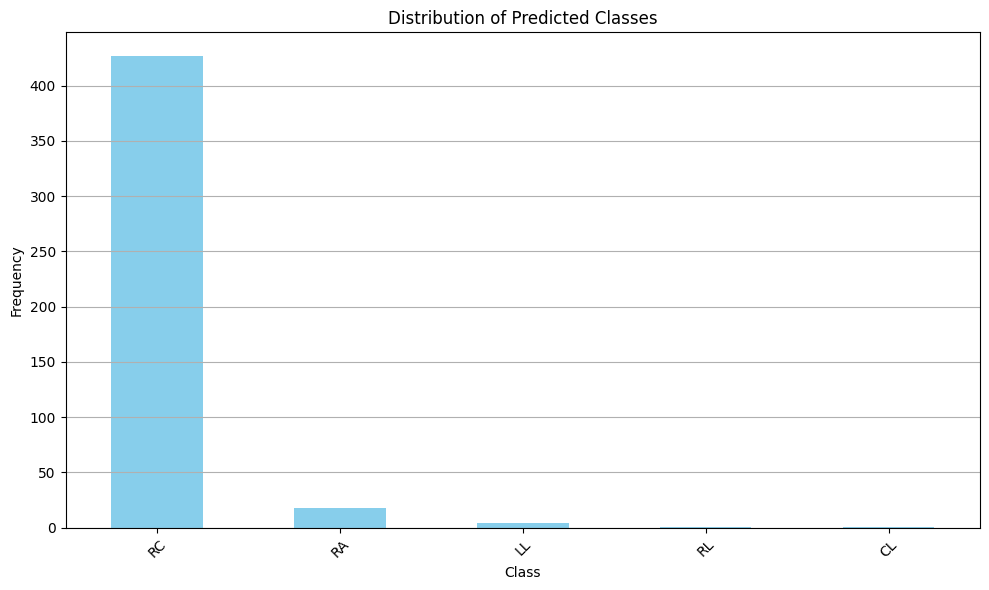

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import pickle

# Load the new dataset
df = pd.read_csv("Random dataset.csv")

# Ensure column names are stripped of any whitespace
df.columns = df.columns.str.strip()

# Combine the relevant columns into 'Combined_Content'
df['Combined_Content'] = df[['Headline', 'Content', 'Human Summary']].fillna('').agg(' '.join, axis=1)

# Load the tokenizer
with open('C:/Users/siddd/OneDrive/Desktop/srh/master_Thesis//Nlp/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Preprocess the text data
texts = df['Combined_Content'].astype(str).tolist()
sequences = tokenizer.texts_to_sequences(texts)

# Use the same max_sequence_length as used during training
maxlen = 200
data = pad_sequences(sequences, maxlen=maxlen)

# Load the model
model = load_model('C:/Users/siddd/OneDrive/Desktop/srh/master_Thesis/Nlp/lstm_model_with_l2.h5')

# Make predictions
predictions = model.predict(data)

# Decode the predicted classes
class_mapping = {0: 'CC', 1: 'CL', 2: 'LC', 3: 'LL', 4: 'RA', 5: 'RC', 6: 'RL'}
predicted_classes = np.argmax(predictions, axis=1)
df['Predicted_Class'] = [class_mapping[pred] for pred in predicted_classes]

# Display the first few predictions
print(df[['Combined_Content', 'Predicted_Class']].head())

# Visualize the distribution of predicted classes
class_counts = df['Predicted_Class'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Predicted Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

# Adjust 'chunksize' to a number of records that fits comfortably in memory
chunk_size = 1000
json_reader = pd.read_json('train_en_shard_01.json', lines=True, chunksize=chunk_size)

for chunk in json_reader:
    # Process each chunk (DataFrame) here
    print(chunk.head())  # For example, just print the first few rows of each chunk


           id                                                url  \
0  n400000020  https://m.dailyhunt.in/news/india/english/thei...   
1  n400000022  https://m.dailyhunt.in/news/india/english/thei...   
2  n400000084  https://m.dailyhunt.in/news/india/english/inc4...   
3  n400000166  https://m.dailyhunt.in/news/india/english/true...   
4  n400000164  https://m.dailyhunt.in/news/india/english/true...   

                                            headline  publication_date  \
0  A more muscular NATO emerges as West confronts...     1656581763000   
1  Heated debate erupts over what happened inside...     1656581770000   
2  Lenskart Acquires Japan's Eyewear Brand OWNDAY...     1656578691000   
3  Words fall short to express gratitude, actress...     1656579473000   
4  Sofia Hayat hospitalised as her body salt leve...     1656579473000   

                                                text  \
0    Written by Steven Erlanger and Michael D. Sh...   
1    Written by Zolan Kanno-Youngs

In [23]:
import pandas as pd

# Path to your JSON file
file_path = 'train_en_shard_01.json'

# Initialize an empty DataFrame to hold chunks
full_data = pd.DataFrame()

# Adjust 'chunksize' to a number of records that fits comfortably in memory
chunk_size = 1000
json_reader = pd.read_json(file_path, lines=True, chunksize=chunk_size)

# Loop over each chunk and concatenate to the full DataFrame
for chunk in json_reader:
    full_data = pd.concat([full_data, chunk], ignore_index=True)

# Now full_data holds all data
print("DataFrame Head:")
print(full_data.head())  # Print the first few rows of the full DataFrame
print("\nColumn Names:")
print(full_data.columns)  # Print the names of the columns

# Save the DataFrame to a new CSV file
full_data.to_csv('git_data_1.csv', index=False)





DataFrame Head:
           id                                                url  \
0  n400000020  https://m.dailyhunt.in/news/india/english/thei...   
1  n400000022  https://m.dailyhunt.in/news/india/english/thei...   
2  n400000084  https://m.dailyhunt.in/news/india/english/inc4...   
3  n400000166  https://m.dailyhunt.in/news/india/english/true...   
4  n400000164  https://m.dailyhunt.in/news/india/english/true...   

                                            headline  publication_date  \
0  A more muscular NATO emerges as West confronts...     1656581763000   
1  Heated debate erupts over what happened inside...     1656581770000   
2  Lenskart Acquires Japan's Eyewear Brand OWNDAY...     1656578691000   
3  Words fall short to express gratitude, actress...     1656579473000   
4  Sofia Hayat hospitalised as her body salt leve...     1656579473000   

                                                text  \
0    Written by Steven Erlanger and Michael D. Sh...   
1    Written by Zo

In [33]:
full_data.head(1)


,id,url,headline,publication_date,text,tags,reactions,source_media,source_url,word_count,langCode
0,n400000020,https://m.dailyhunt.in/news/india/english/thei...,A more muscular NATO emerges as West confronts...,1656581763000,Written by Steven Erlanger and Michael D. Sh...,"[Latest News, World, Virtual Democracy Summit,...","{'SHARE': '10', 'HAPPY': '1', 'LIKE': '1'}",The Indian Express,https://www.nytimes.com/2022/06/29/world/europ...,1340,en


157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step
                                                text Predicted_Class
0    Written by Steven Erlanger and Michael D. Sh...              CC
1    Written by Zolan Kanno-Youngs and Maggie Hab...              CL
2  Omnichannel eyewear brand Lenskart has acquire...              CL
3   Actress Raashi Khanna, who plays the female l...              CL
4   Actress and former girlfriend of Indian crick...              CL


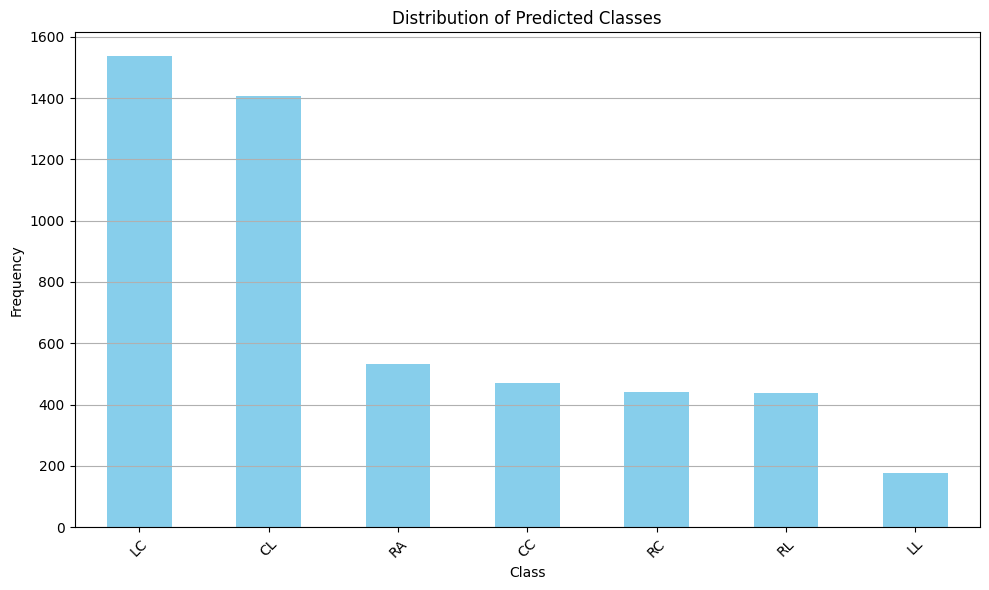

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import pickle

# Load the new dataset
df = pd.read_csv("git_data_1.csv")

# Ensure column names are stripped of any whitespace
df.columns = df.columns.str.strip()

# Select only the first 1000 rows for prediction
df = df.head(5000)

# Load the tokenizer
with open('C:/Users/siddd/OneDrive/Desktop/srh/master_Thesis//Nlp/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Preprocess the text data from the 'text' column
texts = df['text'].astype(str).tolist()
sequences = tokenizer.texts_to_sequences(texts)

# Use the same max_sequence_length as used during training
maxlen = 200
data = pad_sequences(sequences, maxlen=maxlen)

# Load the model
model = load_model('C:/Users/siddd/OneDrive/Desktop/srh/master_Thesis/Nlp/lstm_model_with_l2.h5')

# Make predictions
predictions = model.predict(data)

# Decode the predicted classes
class_mapping = {0: 'CC', 1: 'CL', 2: 'LC', 3: 'LL', 4: 'RA', 5: 'RC', 6: 'RL'}
predicted_classes = np.argmax(predictions, axis=1)
df['Predicted_Class'] = [class_mapping[pred] for pred in predicted_classes]

# Display the first few predictions
print(df[['text', 'Predicted_Class']].head())

# Visualize the distribution of predicted classes
class_counts = df['Predicted_Class'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Predicted Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()



3125/3125 ━━━━━━━━━━━━━━━━━━━━ 110s 35ms/step
                                                     text Predicted_Class  \
519682  Finance minister Nirmala Sitharaman on Tuesday...              RC   
731491   People celebrate after sentencing of those ac...              RA   
512240   Chandigarh, Jan 31 (PTI) Horses worth Rs 95.8...              LC   
459826      Arun Misra is the first Indian and Asian t...              RL   
111202   Additional Secretary in the Department of Def...              RL   

          publication_date  
519682 2022-02-01 07:34:31  
731491 2022-02-20 22:20:39  
512240 2022-01-31 14:32:20  
459826 2022-01-26 11:30:06  
111202 2022-07-11 06:01:33  


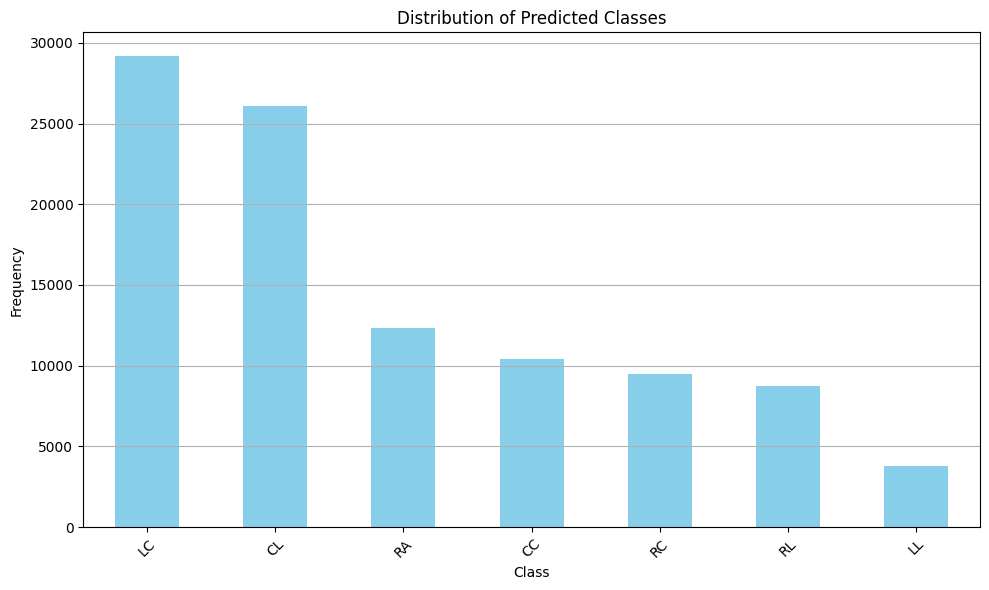

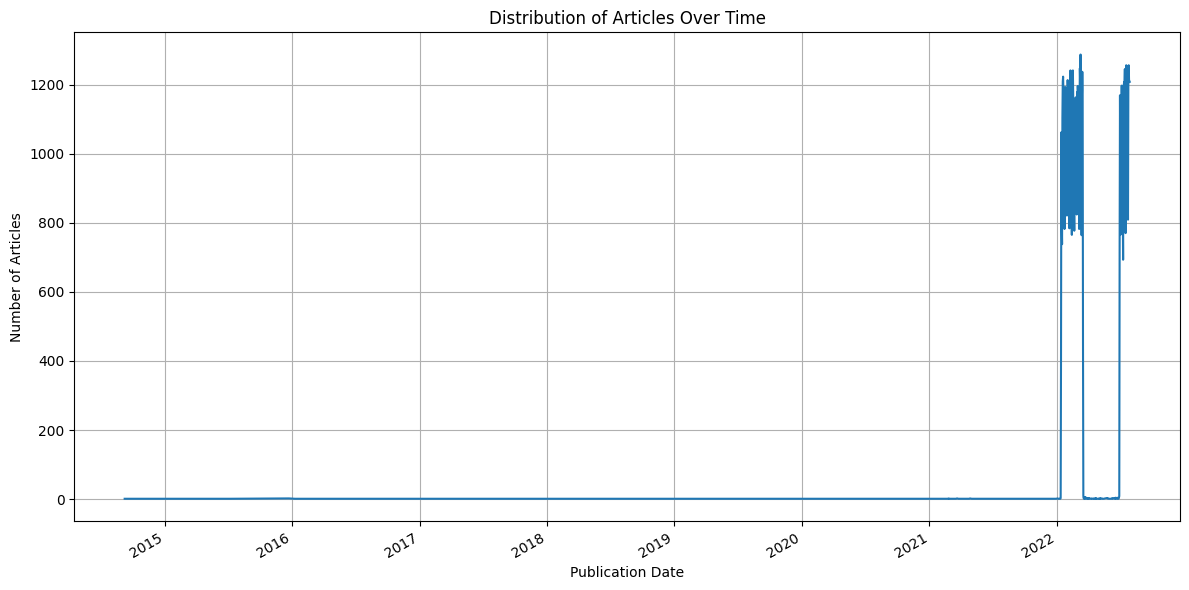

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import pickle

# Load the new dataset
df = pd.read_csv("git_data_1.csv")

# Ensure column names are stripped of any whitespace
df.columns = df.columns.str.strip()

# Convert 'publication_date' to datetime format, ignoring out-of-bound errors
df['publication_date'] = pd.to_datetime(df['publication_date'], unit='ms', errors='coerce')

# Optionally, remove rows where 'publication_date' is NaT if you don't want to include them
df = df.dropna(subset=['publication_date'])

# Select a random sample of 5000 rows from the DataFrame
if len(df) >= 100000:
    df_sample = df.sample(n=100000, random_state=42)
else:
    df_sample = df.sample(n=100000, random_state=42, replace=True)

# Load the tokenizer
with open('C:/Users/siddd/OneDrive/Desktop/srh/master_Thesis//Nlp/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Preprocess the text data from the 'text' column
texts = df_sample['text'].astype(str).tolist()
sequences = tokenizer.texts_to_sequences(texts)

# Use the same max_sequence_length as used during training
maxlen = 200
data = pad_sequences(sequences, maxlen=maxlen)

# Load the model
model = load_model('C:/Users/siddd/OneDrive/Desktop/srh/master_Thesis/Nlp/lstm_model_with_l2.h5')

# Make predictions
predictions = model.predict(data)

# Decode the predicted classes
class_mapping = {0: 'CC', 1: 'CL', 2: 'LC', 3: 'LL', 4: 'RA', 5: 'RC', 6: 'RL'}
predicted_classes = np.argmax(predictions, axis=1)
df_sample['Predicted_Class'] = [class_mapping[pred] for pred in predicted_classes]

# Display the first few predictions
print(df_sample[['text', 'Predicted_Class', 'publication_date']].head())

# Visualize the distribution of predicted classes
class_counts = df_sample['Predicted_Class'].value_counts()

# Plotting class distribution
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Predicted Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plotting publication dates
plt.figure(figsize=(12, 6))
df_sample['publication_date'].dt.floor('d').value_counts().sort_index().plot(kind='line')
plt.title('Distribution of Articles Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

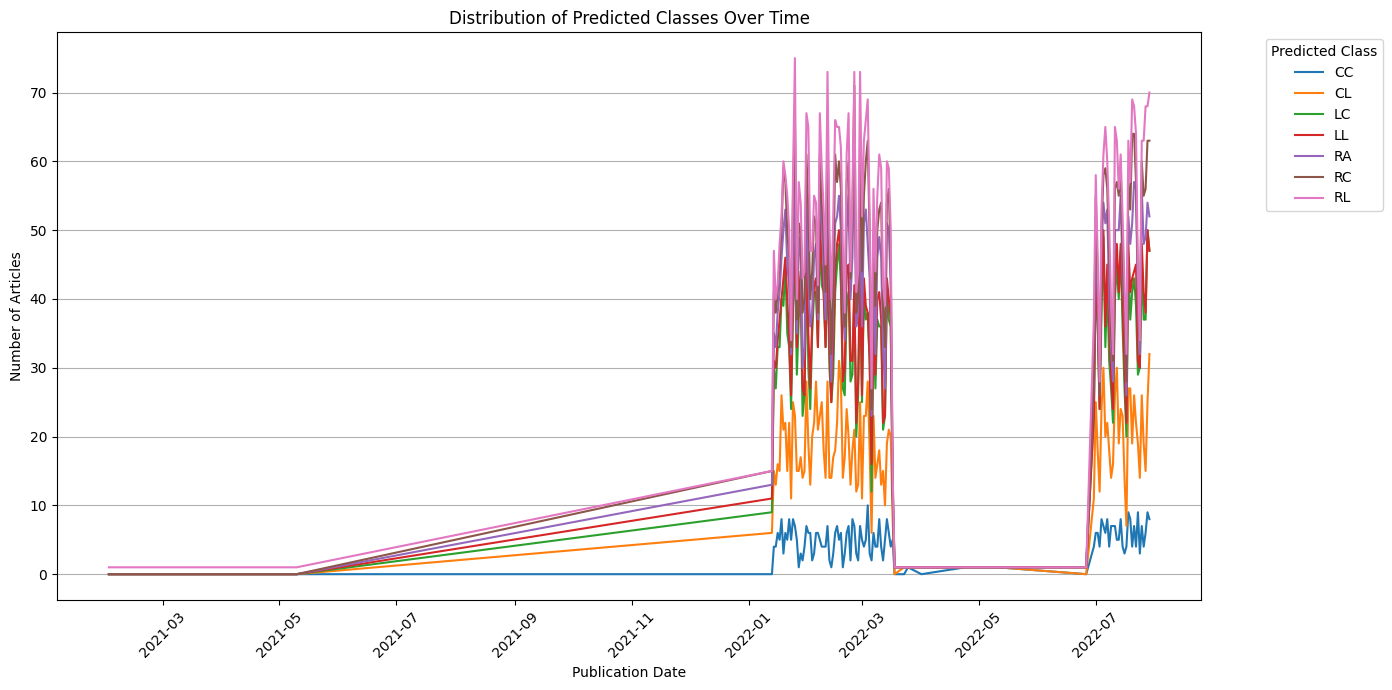

In [38]:
import matplotlib.pyplot as plt

# Prepare the data: group by date (daily) and predicted class, then count occurrences
grouped = df_sample.groupby([df_sample['publication_date'].dt.date, 'Predicted_Class']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 7))

# Option 1: Line plot for each class
# grouped.plot(kind='line', marker='o', linewidth=2)
# plt.title('Time Series Distribution of Predicted Classes')
# plt.ylabel('Number of Articles')
# plt.xlabel('Publication Date')
# plt.grid(True)

# Option 2: Stacked bar plot for visibility of distribution
grouped.plot(kind='line', stacked=True, figsize=(14, 7))
plt.title('Distribution of Predicted Classes Over Time')
plt.ylabel('Number of Articles')
plt.xlabel('Publication Date')
plt.xticks(rotation=45)
plt.legend(title='Predicted Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [28]:
import datetime

# Your timestamp in milliseconds
timestamp_ms = 1656581763000

# Convert milliseconds to seconds (as datetime expects seconds)
timestamp_s = timestamp_ms / 1000

# Convert the timestamp to a datetime object
date_time = datetime.datetime.utcfromtimestamp(timestamp_s)

# Print the human-readable form
print(date_time.strftime('%Y-%m-%d %H:%M:%S'))


2022-06-30 09:36:03


In [29]:
# Assuming 'df' is your DataFrame

# Get unique values in the 'source_media' column
unique_source_media = df['source_media'].unique()

# Print the unique values
print(unique_source_media)


['The Indian Express' 'Inc42' 'True Scoop' 'News18' 'India.com'
 'LokmatTimes English' 'DNA' 'Naukri Nama' 'TimesNowNews'
 'Investment Guru India' 'Digit' 'Republic TV' 'Only My Health'
 'Medically Speaking' 'India Press Agency News Pack' 'News24 Online'
 'National Herald' '5 Dariya News' 'Capital Market' 'The News Minute '
 'CNBCTV18' 'The Statesman' 'HT Auto' 'News Karnataka' 'OTTplay'
 'Deccan Herald' 'Desimartini English' 'News9 Live' 'Mid-Day' 'BikeDekho'
 'Your Story' 'Money Control' 'Latestly' 'The New Indian Express'
 'Tupaki.com' 'Slurrp' 'The Print' 'Medianews4U.COM' 'Real Voice of India'
 'APN Live' 'SheThePeople' 'PratidinTime' 'Shillong Times'
 'Free Press Journal' 'News Track Live' 'Zee News' 'Sportzwiki'
 'THE LOGICAL INDIAN' 'The Siasat Daily' 'EastMojo' 'WION' 'Daily-sun'
 'India Today' 'News Patrolling' 'My Khel' 'ETV Bharat English' 'ABP Live'
 'Telangana Today' 'InsideSport' 'PAGALPARROT' 'Spotboye'
 'PR NewsWire English' 'Bollywoodshaadis' 'Vishva Times' 'The Quint

# combine datasets

In [18]:
import pandas as pd

# List of JSON file paths
json_files = [
    'train_en_shard_01.json',
    'train_en_shard_02.json',
    'train_en_shard_03.json',
    'train_en_shard_04.json',
    'train_en_shard_05.json',
    'train_en_shard_06.json',
    'train_en_shard_07.json',
    'train_en_shard_08.json'
]

combined_df = pd.DataFrame()

# Loop over the list of files
for file in json_files:
    # Read each file in chunks
    chunk_size = 10000  # You can adjust the chunk size based on your system's memory capacity
    json_reader = pd.read_json(file, lines=True, chunksize=chunk_size)
    for chunk in json_reader:
        # Append each chunk to the combined DataFrame
        combined_df = pd.concat([combined_df, chunk], ignore_index=True)

# Display the head of the combined DataFrame to check it
print(combined_df.head())

           id                                                url  \
0  n400000020  https://m.dailyhunt.in/news/india/english/thei...   
1  n400000022  https://m.dailyhunt.in/news/india/english/thei...   
2  n400000084  https://m.dailyhunt.in/news/india/english/inc4...   
3  n400000166  https://m.dailyhunt.in/news/india/english/true...   
4  n400000164  https://m.dailyhunt.in/news/india/english/true...   

                                            headline  publication_date  \
0  A more muscular NATO emerges as West confronts...     1656581763000   
1  Heated debate erupts over what happened inside...     1656581770000   
2  Lenskart Acquires Japan's Eyewear Brand OWNDAY...     1656578691000   
3  Words fall short to express gratitude, actress...     1656579473000   
4  Sofia Hayat hospitalised as her body salt leve...     1656579473000   

                                                text  \
0    Written by Steven Erlanger and Michael D. Sh...   
1    Written by Zolan Kanno-Youngs

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combined_df' is your DataFrame
# Convert 'publication_date' to datetime format if not already done
combined_df['publication_date'] = pd.to_datetime(combined_df['publication_date'], unit='ms', errors='coerce')

# Drop rows where dates couldn't be converted
combined_df.dropna(subset=['publication_date'], inplace=True)

# Filter the DataFrame to only include dates after the start of 2022
filtered_df = combined_df[combined_df['publication_date'] >= pd.Timestamp('2022-01-01')]


In [20]:
# Set the datetime column as the DataFrame's index
filtered_df.set_index('publication_date', inplace=True)

# Resample data by day (change to 'W' for weekly, 'M' for monthly as needed)
daily_counts = filtered_df.resample('D').size()






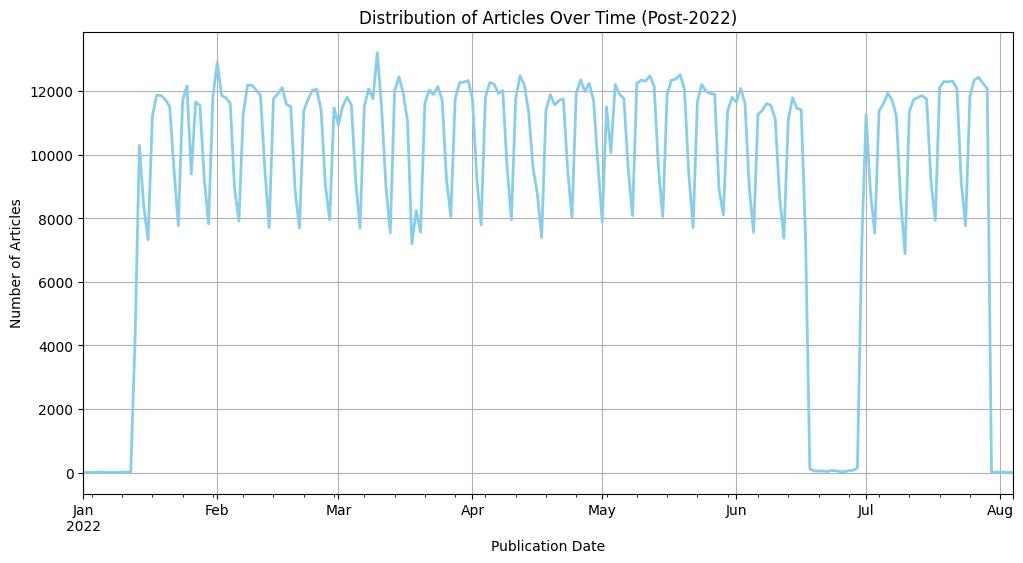

In [21]:
# Plotting
plt.figure(figsize=(12, 6))
daily_counts.plot(title='Distribution of Articles Over Time (Post-2022)', color='skyblue', linewidth=2)
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

# for first and last year

In [30]:
import pandas as pd

# Load a small sample to check the time range
sample_df = pd.read_json('train_en_shard_01.json', lines=True, nrows=1000)

# Convert publication_date to datetime
sample_df['publication_date'] = pd.to_datetime(sample_df['publication_date'], unit='ms')

# Check the range of years
print(sample_df['publication_date'].dt.year.min(), sample_df['publication_date'].dt.year.max())


2022 2022


In [35]:
import pandas as pd

# Load a small sample to check the time range
sample_df = pd.read_json('train_en_shard_04.json', lines=True, nrows=1000)

# Convert publication_date to datetime
sample_df['publication_date'] = pd.to_datetime(sample_df['publication_date'], unit='ms')

# Check the range of years
print(sample_df['publication_date'].dt.year.min(), sample_df['publication_date'].dt.year.max())

1970 2021


In [39]:
import pandas as pd

# Load a small sample to check the time range
sample_df = pd.read_json('train_en_shard_08.json', lines=True, nrows=1000)

# Convert publication_date to datetime
sample_df['publication_date'] = pd.to_datetime(sample_df['publication_date'], unit='ms')

# Check the range of years
print(sample_df['publication_date'].dt.year.min(), sample_df['publication_date'].dt.year.max())

2016 2022


In [41]:
import pandas as pd

# List of JSON file paths
json_files = [
    'train_en_shard_01.json',
    'train_en_shard_02.json',
    'train_en_shard_03.json',
    'train_en_shard_04.json',
    'train_en_shard_05.json',
    'train_en_shard_06.json',
    'train_en_shard_07.json',
    'train_en_shard_08.json'
]

# Initialize a dictionary to hold year counts
year_counts = {}

# Loop over the list of files
for file in json_files:
    # Read each file in chunks
    chunk_size = 10000  # Adjust based on your system's capability
    json_reader = pd.read_json(file, lines=True, chunksize=chunk_size)
    for chunk in json_reader:
        # Convert publication_date to datetime, ignoring errors
        chunk['publication_date'] = pd.to_datetime(chunk['publication_date'], unit='ms', errors='coerce')
        
        # Drop any rows where 'publication_date' is NaT due to conversion errors
        chunk = chunk.dropna(subset=['publication_date'])
        
        # Extract year and count occurrences
        year_series = chunk['publication_date'].dt.year
        for year in year_series:
            if year in year_counts:
                year_counts[year] += 1
            else:
                year_counts[year] = 1

# Print the counts for each year
for year, count in sorted(year_counts.items()):
    print(f"Year {year}: {count} entries")



Year 1970: 47 entries
Year 2006: 21 entries
Year 2007: 5 entries
Year 2008: 4 entries
Year 2009: 20 entries
Year 2010: 9 entries
Year 2011: 12 entries
Year 2012: 161 entries
Year 2013: 245 entries
Year 2014: 56 entries
Year 2015: 558 entries
Year 2016: 1749 entries
Year 2017: 1520 entries
Year 2018: 374 entries
Year 2019: 580 entries
Year 2020: 1491700 entries
Year 2021: 3491397 entries
Year 2022: 2261131 entries


In [42]:
import pandas as pd
import numpy as np

def process_and_filter_json(file_path, sample_size, years_sample, year_counts, all_data):
    chunk_size = 10000  # Adjust the chunk size based on your system's capability
    year_sample_collected = {year: 0 for year in years_sample}  # Track how many samples have been collected per year

    # Read the file in chunks
    json_reader = pd.read_json(file_path, lines=True, chunksize=chunk_size)
    for chunk in json_reader:
        # Convert publication_date to datetime, handling out-of-bounds with coercion
        chunk['publication_date'] = pd.to_datetime(chunk['publication_date'], unit='ms', errors='coerce')
        chunk.dropna(subset=['publication_date'], inplace=True)  # Remove NaT entries

        # Filter by year and count occurrences
        chunk['year'] = chunk['publication_date'].dt.year
        chunk_counts = chunk['year'].value_counts().to_dict()
        for year, count in chunk_counts.items():
            year_counts[year] = year_counts.get(year, 0) + count
        
        # Separate the data before 2020 and from 2020 to 2022
        older_data = chunk[chunk['year'] <= 2019]
        recent_data = chunk[(chunk['year'] >= 2020) & (chunk['year'] <= 2022)]

        # Collect all older data
        all_data.append(older_data)

        # Randomly sample from recent data if not enough samples have been collected
        for year in years_sample:
            if year_sample_collected[year] < sample_size:
                available_samples = recent_data[recent_data['year'] == year]
                samples_needed = sample_size - year_sample_collected[year]
                sampled_data = available_samples.sample(min(len(available_samples), samples_needed), random_state=42)
                year_sample_collected[year] += len(sampled_data)
                all_data.append(sampled_data)
                if year_sample_collected[year] >= sample_size:
                    print(f"Collected enough samples for {year}")

    return all_data, year_counts

# Initialize storage for data and counts
all_data = []
year_counts = {}

# List of JSON file paths
json_files = [
    'train_en_shard_01.json',
    'train_en_shard_02.json',
    'train_en_shard_03.json',
    'train_en_shard_04.json',
    'train_en_shard_05.json',
    'train_en_shard_06.json',
    'train_en_shard_07.json',
    'train_en_shard_08.json'
]

# Define years from which to sample and the sample size
sample_size = 5000
years_sample = [2020, 2021, 2022]

# Process each file
for file in json_files:
    all_data, year_counts = process_and_filter_json(file, sample_size, years_sample, year_counts, all_data)

# Concatenate all the collected data into one DataFrame
final_df = pd.concat(all_data, ignore_index=True)
print("Final DataFrame shape:", final_df.shape)


Collected enough samples for 2022
Collected enough samples for 2022
Collected enough samples for 2022
Collected enough samples for 2021
Collected enough samples for 2021
Collected enough samples for 2022
Collected enough samples for 2021
Collected enough samples for 2021
Collected enough samples for 2020
Collected enough samples for 2020
Collected enough samples for 2021
Collected enough samples for 2021
Final DataFrame shape: (68660, 12)


In [43]:
final_df.head()

,id,url,headline,publication_date,text,tags,reactions,source_media,source_url,word_count,langCode,year
0,n400030260,https://m.dailyhunt.in/news/india/english/theq...,Man Grabs A Waitress' Butt. He'll Never Forget...,2015-12-23 09:45:00,"'Hell hath no fury like a woman scorned', the...",[newsnew],{},The Quint,https://www.thequint.com/lifestyle/man-grabs-a...,74,en,2015
1,n400101244,https://m.dailyhunt.in/news/india/english/hind...,TNUSRB recruitment 2022: Notification out for ...,2022-06-30 12:10:03,TNUSRB recruitment 2022: Tamil Nadu Uniformed ...,"[Education, education]",{},Hindustan Times,https://www.hindustantimes.com/education/emplo...,253,en,2022
2,n400099498,https://m.dailyhunt.in/news/india/english/uday...,Kangana Ranaut takes swipe at Shiv Sena after ...,2022-06-30 13:16:47,A day after Uddhav Thackeray resigned as Mahar...,"[Uddhav Thackeray Covid Positive, Happy Birthd...",{},Udayavani,https://www.udayavani.com/english-news/kangana...,234,en,2022
3,n400038790,https://m.dailyhunt.in/news/india/english/thef...,Delhi University's standing committee clears d...,2022-06-30 10:44:12,New Delhi: Delhi University's Standing Commit...,"[Dilli, Delhi, defaultfeed]",{},Free Press Journal,https://www.freepressjournal.in/education/delh...,299,en,2022
4,n400119458,https://m.dailyhunt.in/news/india/english/repu...,FRIENDS Creator Marta Kauffman Pledges $4mn As...,2022-06-30 15:00:59,Friends is one of the most beloved sitcoms o...,"[Lifestyle, entertainment, Entertainment]",{},Republic TV,https://www.republicworld.com/entertainment-ne...,381,en,2022


In [44]:
import pandas as pd

# Assuming 'final_df' is your DataFrame

# Convert publication_date to datetime if not already done
final_df['publication_date'] = pd.to_datetime(final_df['publication_date'], unit='ms', errors='coerce')

# Separate the articles by year
older_articles = final_df[final_df['publication_date'].dt.year <= 2019]
recent_articles = final_df[final_df['publication_date'].dt.year >= 2020]

# Check if recent articles are more than 5000 and sample if necessary
if len(recent_articles) > 5000:
    recent_articles = recent_articles.sample(n=5000, random_state=42)  # Random state for reproducibility

# Concatenate older articles with sampled recent articles
final_adjusted_df = pd.concat([older_articles, recent_articles], ignore_index=True)

# Check the new shape and distribution
print("Adjusted DataFrame shape:", final_adjusted_df.shape)
print("Distribution of articles by year in the adjusted DataFrame:")
print(final_adjusted_df['publication_date'].dt.year.value_counts())


Adjusted DataFrame shape: (10361, 12)
Distribution of articles by year in the adjusted DataFrame:
publication_date
2021    2441
2016    1749
2022    1705
2017    1520
2020     854
2019     580
2015     558
2018     374
2013     245
2012     161
2014      56
1970      47
2006      21
2009      20
2011      12
2010       9
2007       5
2008       4
Name: count, dtype: int64


In [45]:
final_adjusted_df.to_csv('DataForGraph_5000.csv', index=False)

In [47]:
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import pickle

# Load the tokenizer
with open('C:/Users/siddd/OneDrive/Desktop/srh/master_Thesis//Nlp/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Preprocess the text data from the 'text' column
texts = final_adjusted_df['text'].astype(str).tolist()
sequences = tokenizer.texts_to_sequences(texts)

# Use the same max_sequence_length as used during training
maxlen = 200
data = pad_sequences(sequences, maxlen=maxlen)

# Load the model
model = load_model('C:/Users/siddd/OneDrive/Desktop/srh/master_Thesis/Nlp/lstm_model_with_l2.h5')

# Make predictions
predictions = model.predict(data)

# Decode the predicted classes using your mapping
class_mapping = {0: 'CC', 1: 'CL', 2: 'LC', 3: 'LL', 4: 'RA', 5: 'RC', 6: 'RL'}
predicted_classes = np.argmax(predictions, axis=1)
final_adjusted_df['Predicted_Class'] = [class_mapping[pred] for pred in predicted_classes]

# Display the DataFrame with the new 'Predicted_Class' column
print(final_adjusted_df.head())



324/324 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
           id                                                url  \
0  n400030260  https://m.dailyhunt.in/news/india/english/theq...   
1  n401706866  https://m.dailyhunt.in/news/india/english/bqpr...   
2  n401706868  https://m.dailyhunt.in/news/india/english/bqpr...   
3  n401706870  https://m.dailyhunt.in/news/india/english/bqpr...   
4  n401706872  https://m.dailyhunt.in/news/india/english/bqpr...   

                                            headline    publication_date  \
0  Man Grabs A Waitress' Butt. He'll Never Forget... 2015-12-23 09:45:00   
1  BQLearning: Cops At Your Door. Should You Let ... 2019-10-06 05:21:46   
2       BQLearning: Reading A Stock Chart Simplified 2019-08-23 08:10:26   
3  BQLearning: Significance Of A Shooting Star Ca... 2019-08-21 10:00:00   
4  BQLearning: What Are Doji, Morning Star Doji A... 2019-08-16 10:51:55   

                                                text        tags reactions  \
0   'Hell hath

In [48]:
final_adjusted_df.to_csv('DataForGraph_5000_Predicted.csv', index=False)

In [49]:
import pandas as pd

# Convert 'publication_date' to datetime if it's not already
final_adjusted_df['publication_date'] = pd.to_datetime(final_adjusted_df['publication_date'], unit='ms', errors='coerce')


In [52]:
# Group by year and 'Predicted_Class', and count occurrences
grouped = final_adjusted_df.groupby([final_adjusted_df['publication_date'].dt.year, 'Predicted_Class']).size().unstack(fill_value=0)



<Figure size 1400x700 with 0 Axes>

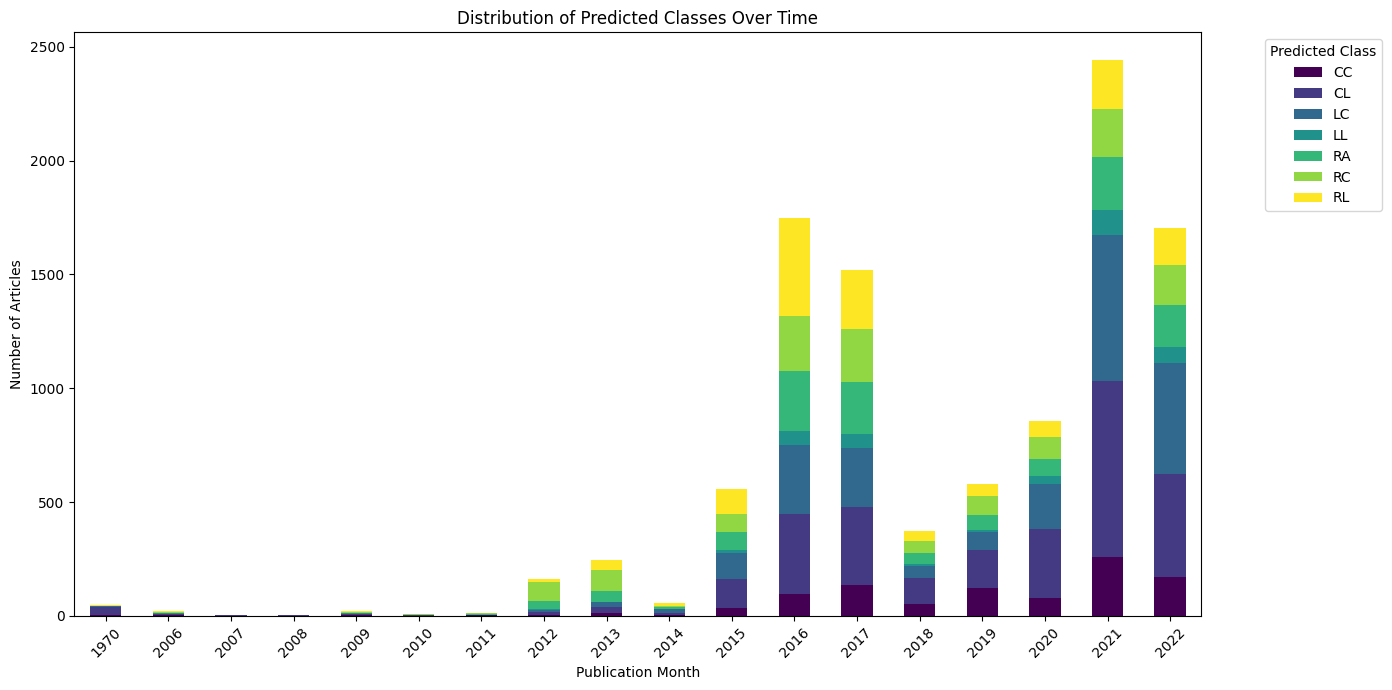

In [53]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(14, 7))
grouped.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')  # 'viridis' is just one option for a colormap
plt.title('Distribution of Predicted Classes Over Time')
plt.xlabel('Publication Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.legend(title='Predicted Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# before 2019

In [54]:
import pandas as pd

# Assume 'final_adjusted_df' already has 'publication_date' converted to datetime
final_adjusted_df['Time_Period'] = final_adjusted_df['publication_date'].dt.year.apply(lambda x: 'Before 2019' if x < 2019 else '2019 and After')


In [55]:
# Group by 'Time_Period' and 'Predicted_Class', and count occurrences
grouped = final_adjusted_df.groupby(['Time_Period', 'Predicted_Class']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

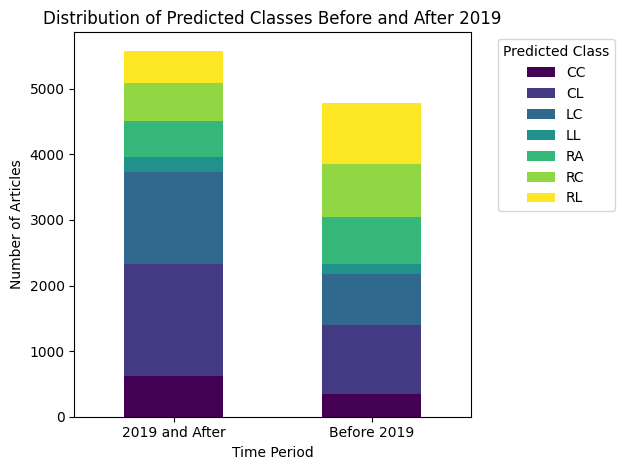

In [56]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 6))
grouped.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Predicted Classes Before and After 2019')
plt.xlabel('Time Period')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)  # Adjust rotation to improve label readability
plt.legend(title='Predicted Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [57]:
# Calculate percentages for the grouped data
percent_grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100


<Figure size 1200x600 with 0 Axes>

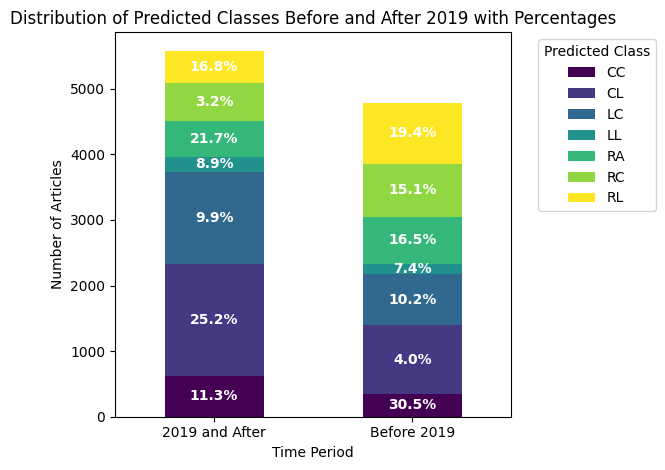

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the data
plt.figure(figsize=(12, 6))
ax = grouped.plot(kind='bar', stacked=True, colormap='viridis')

# Adding annotations
for n, (rect, label) in enumerate(zip(ax.patches, percent_grouped.values.flatten())):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2,
            f"{label:.1f}%", ha='center', va='center', color='white', fontweight='bold')

plt.title('Distribution of Predicted Classes Before and After 2019 with Percentages')
plt.xlabel('Time Period')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)  # Adjust rotation to improve label readability
plt.legend(title='Predicted Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# seperate

In [59]:
import pandas as pd

# Group the classes by their starting letter
final_adjusted_df['Class_Group'] = final_adjusted_df['Predicted_Class'].apply(lambda x: x[0])

# Group by time period and new class group, then count occurrences
grouped_by_letter = final_adjusted_df.groupby(['Time_Period', 'Class_Group']).size().unstack(fill_value=0)


In [60]:
# Calculate percentages for the new grouped data
percent_grouped_by_letter = grouped_by_letter.div(grouped_by_letter.sum(axis=1), axis=0) * 100


<Figure size 1200x600 with 0 Axes>

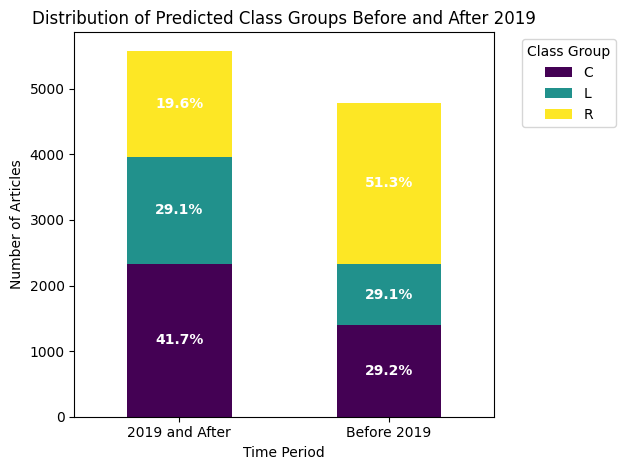

In [61]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 6))
ax = grouped_by_letter.plot(kind='bar', stacked=True, colormap='viridis')

# Adding annotations
for n, (rect, label) in enumerate(zip(ax.patches, percent_grouped_by_letter.values.flatten())):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2,
            f"{label:.1f}%", ha='center', va='center', color='white', fontweight='bold')

plt.title('Distribution of Predicted Class Groups Before and After 2019')
plt.xlabel('Time Period')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)  # Adjust rotation to improve label readability
plt.legend(title='Class Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [66]:
import pandas as pd

# Assuming the 'Time_Period' and 'Class_Group' are already set up in final_adjusted_df
grouped_by_letter = final_adjusted_df.groupby(['Time_Period', 'Class_Group']).size().unstack(fill_value=0)



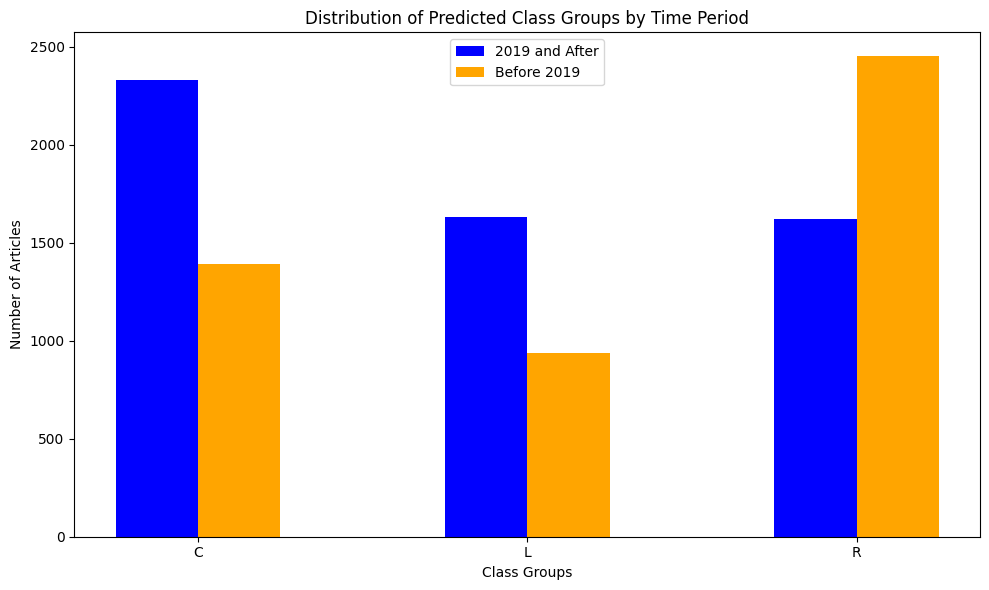

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Configuration parameters
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25  # Width of each bar
index = np.arange(len(grouped_by_letter.columns))  # Column index
colors = ['blue', 'orange', 'green']  # Colors for each group

# Create bars for each time period
for i, time_period in enumerate(grouped_by_letter.index):
    rects = ax.bar(index + i * bar_width, grouped_by_letter.loc[time_period], bar_width, label=time_period, color=colors[i % len(colors)])

# Add some text for labels, title and axes ticks
ax.set_xlabel('Class Groups')
ax.set_ylabel('Number of Articles')
ax.set_title('Distribution of Predicted Class Groups by Time Period')
ax.set_xticks(index + bar_width / 2 * (len(grouped_by_letter.index) - 1))
ax.set_xticklabels(grouped_by_letter.columns)
ax.legend()

plt.tight_layout()
plt.show()



2nd type

In [68]:
import pandas as pd

# Create a new column for class group based on the last letter of the Predicted_Class
final_adjusted_df['Class_End_Group'] = final_adjusted_df['Predicted_Class'].apply(lambda x: x[-1])


In [69]:
# Group by 'Time_Period' and 'Class_End_Group', then count occurrences
grouped_by_end_letter = final_adjusted_df.groupby(['Time_Period', 'Class_End_Group']).size().unstack(fill_value=0)


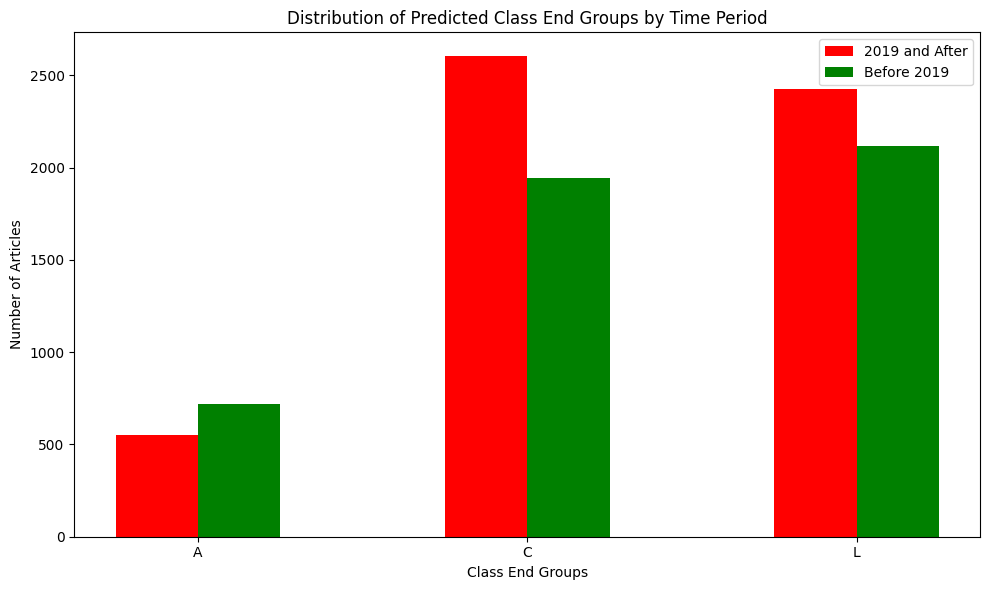

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Setup for plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25  # Width of each bar
index = np.arange(len(grouped_by_end_letter.columns))  # Column index
colors = ['red', 'green', 'blue']  # Colors for each group, assuming groups are 'C', 'L', 'A'

# Create bars for each time period
for i, time_period in enumerate(grouped_by_end_letter.index):
    rects = ax.bar(index + i * bar_width, grouped_by_end_letter.loc[time_period], bar_width, label=time_period, color=colors[i % len(colors)])

# Add some text for labels, title, and axes ticks
ax.set_xlabel('Class End Groups')
ax.set_ylabel('Number of Articles')
ax.set_title('Distribution of Predicted Class End Groups by Time Period')
ax.set_xticks(index + bar_width / 2 * (len(grouped_by_end_letter.index) - 1))
ax.set_xticklabels(grouped_by_end_letter.columns)
ax.legend()

plt.tight_layout()
plt.show()
